# Final Project


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Project Description

The following project ...


## Data Import

For this project, we will mainly be using two data files: `fma-rock-vs-hiphop.csv` and `echonest-metrics.json`.


In [5]:
df_csv = pd.read_csv("../data/fma-rock-vs-hiphop.csv")
df_json = pd.read_json("../data/echonest-metrics.json", precise_float=True)

### CSV File

The `fma-rock-vs-hiphop.csv` file contains some general information for songs, having 17,734 songs and 21 variables.


In [6]:
df_csv.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [7]:
df_csv.shape

(17734, 21)

### JSON File

On the other hand, `echonest-metrics.json` file contains song metadata for 13,129 songs across 9 variables.


In [8]:
df_json.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [9]:
df_json.shape

(13129, 9)

After observing both DataFrames we discover that they both share the `track_id` attribute, which can be used in order to combine them.


## DataFrame Combination

After some research, we found that Pandas has 3 different functions used to combine DataFrames:

- `concat()`
- `merge()`
- `join()`

All of them will be tested to find the most optimal one.


As an initial preventive measure, we will be performing a test to find how many common `track_id` values are found along both DataFrames.

This number will be used as reference for how many rows the combined table should have.


In [10]:
count = 0
for id in df_json.track_id:
    if id in df_csv.track_id.values:
        count = count + 1

print(count)

4802


This means that any combination of the .csv and the .json DataFrames should have 4802 rows, plus 29 attribute columns.


### Concat

The first tested function is `concat()`.


In [11]:
df_concat_inner = pd.concat([df_csv, df_json], axis=1, join="inner")
df_concat_inner.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,title,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,Father's Day,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,Peel Back The Mountain Sky,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,Untitled 04,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,Untitled 11,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,Hundred-Year Flood,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [12]:
df_concat_outer = pd.concat([df_csv, df_json], axis=1, join="outer")
df_concat_outer.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,title,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,Father's Day,2.0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,Peel Back The Mountain Sky,3.0,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,Untitled 04,5.0,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,Untitled 11,10.0,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,Hundred-Year Flood,134.0,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [13]:
df_concat_inner.shape

(13129, 30)

In [14]:
df_concat_outer.shape

(17734, 30)

As we can see, this method is not appropriate for a variety of reasons. First and foremost, there seems to be a problem with the columns of the new DataFrame, due to the `track_id` field being duplicated. Additionaly, the intended number of columns is far from what the calculated count resulted in, meaning thousands of songs have several `Nan` attributes.

The `concat()` function will not work with either inner nor outer joins, because it actually combines DataFrames in an horizontal level, but not really looking for common attributes between them.


### Merge


Now the `merge()` function will be tested.


In [15]:
df_merge = pd.merge(df_csv, df_json, on="track_id")

In [16]:
df_merge.shape

(4802, 29)

Regarding the result provided from the `merge()` function, they appear to be in line with the previously established requierements, meaning we now have our first complete DataFrame with all attributes that a song can have.


In [17]:
music_data = df_merge

## Exploration Data Analysis


After having the first version of our data, we want to visualize it to have an idea of all the attributes it has.


In [18]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   bit_rate          4802 non-null   int64  
 2   comments          4802 non-null   int64  
 3   composer          106 non-null    object 
 4   date_created      4802 non-null   object 
 5   date_recorded     1234 non-null   object 
 6   duration          4802 non-null   int64  
 7   favorites         4802 non-null   int64  
 8   genre_top         4802 non-null   object 
 9   genres            4802 non-null   object 
 10  genres_all        4802 non-null   object 
 11  information       334 non-null    object 
 12  interest          4802 non-null   int64  
 13  language_code     2599 non-null   object 
 14  license           4789 non-null   object 
 15  listens           4802 non-null   int64  
 16  lyricist          13 non-null     object 


We also want to have an idea of how many `Nan` values each of the attributes has.


In [19]:
music_data.isnull().sum()

track_id               0
bit_rate               0
comments               0
composer            4696
date_created           0
date_recorded       3568
duration               0
favorites              0
genre_top              0
genres                 0
genres_all             0
information         4468
interest               0
language_code       2203
license               13
listens                0
lyricist            4789
number                 0
publisher           4775
tags                   0
title                  0
acousticness           0
danceability           0
energy                 0
instrumentalness       0
liveness               0
speechiness            0
tempo                  0
valence                0
dtype: int64

In [20]:
# describe the data without the track_id column

# copy = music_data.drop("track_id", axis=1).copy()
# copy.describe()

### Energy


**_Question:_** Which songs have the highest and lowest levels of energy?


In [21]:
music_data["energy"].describe()

count    4802.000000
mean        0.625126
std         0.244051
min         0.000279
25%         0.450757
50%         0.648374
75%         0.837016
max         0.999768
Name: energy, dtype: float64

In [22]:
print(f"Highest energy level: {np.max(music_data['energy'])}")
print(f"Lowest energy level: {np.min(music_data['energy'])}")

Highest energy level: 0.999767599
Lowest energy level: 0.000278548


Now, we want to determine the genre of both songs.


In [23]:
music_data.loc[music_data["energy"].argmax()]["genre_top"]

'Rock'

In [24]:
music_data.loc[music_data["energy"].argmin()]["genre_top"]

'Rock'

Both the highest and lowest energy songs are Rock songs.


/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/gajokremer/Documents/Career/Semester VII/Artificial_Intelligence/AI-Final-Project/env/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vect

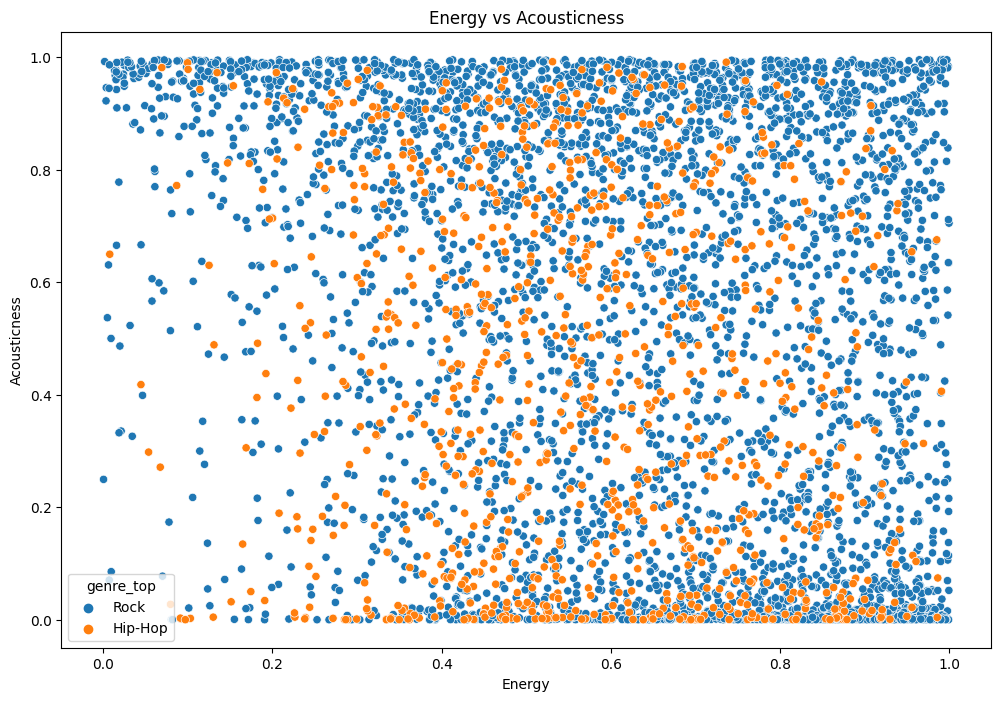

In [25]:
# scatterplot showing the relationship between energy and acousticness

plt.figure(figsize=(12, 8))
# sns.barplot(x="energy", y="acousticness", hue="genre_top", data=music_data)
sns.scatterplot(x="energy", y="acousticness", hue="genre_top", data=music_data)
plt.title("Energy vs Acousticness")
plt.xlabel("Energy")
plt.ylabel("Acousticness")
plt.show()

## Correlation between Numeric Variables


In [26]:
# copy the dataframe to another variable

correlation_data = music_data.copy()

In [27]:
# extract dataframe with 3 columns from correlation_data

columns = [
    "bit_rate",
    "duration",
    "favorites",
    "interest",
    "listens",
    "number",
    "acousticness",
    "danceability",
    "energy",
    "instrumentalness",
    "liveness",
    "speechiness",
    "tempo",
    "valence",
]

correlation_data = correlation_data[columns]

In [28]:
correlation_data.head()

,bit_rate,duration,favorites,interest,listens,number,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,256000,405,5,354,424,2,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,256000,319,1,242,205,4,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,192000,756,1,268,197,0,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,192000,144,1,815,270,1,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,192000,181,0,468,122,2,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [29]:
# sns.pairplot(correlation_data[columns])

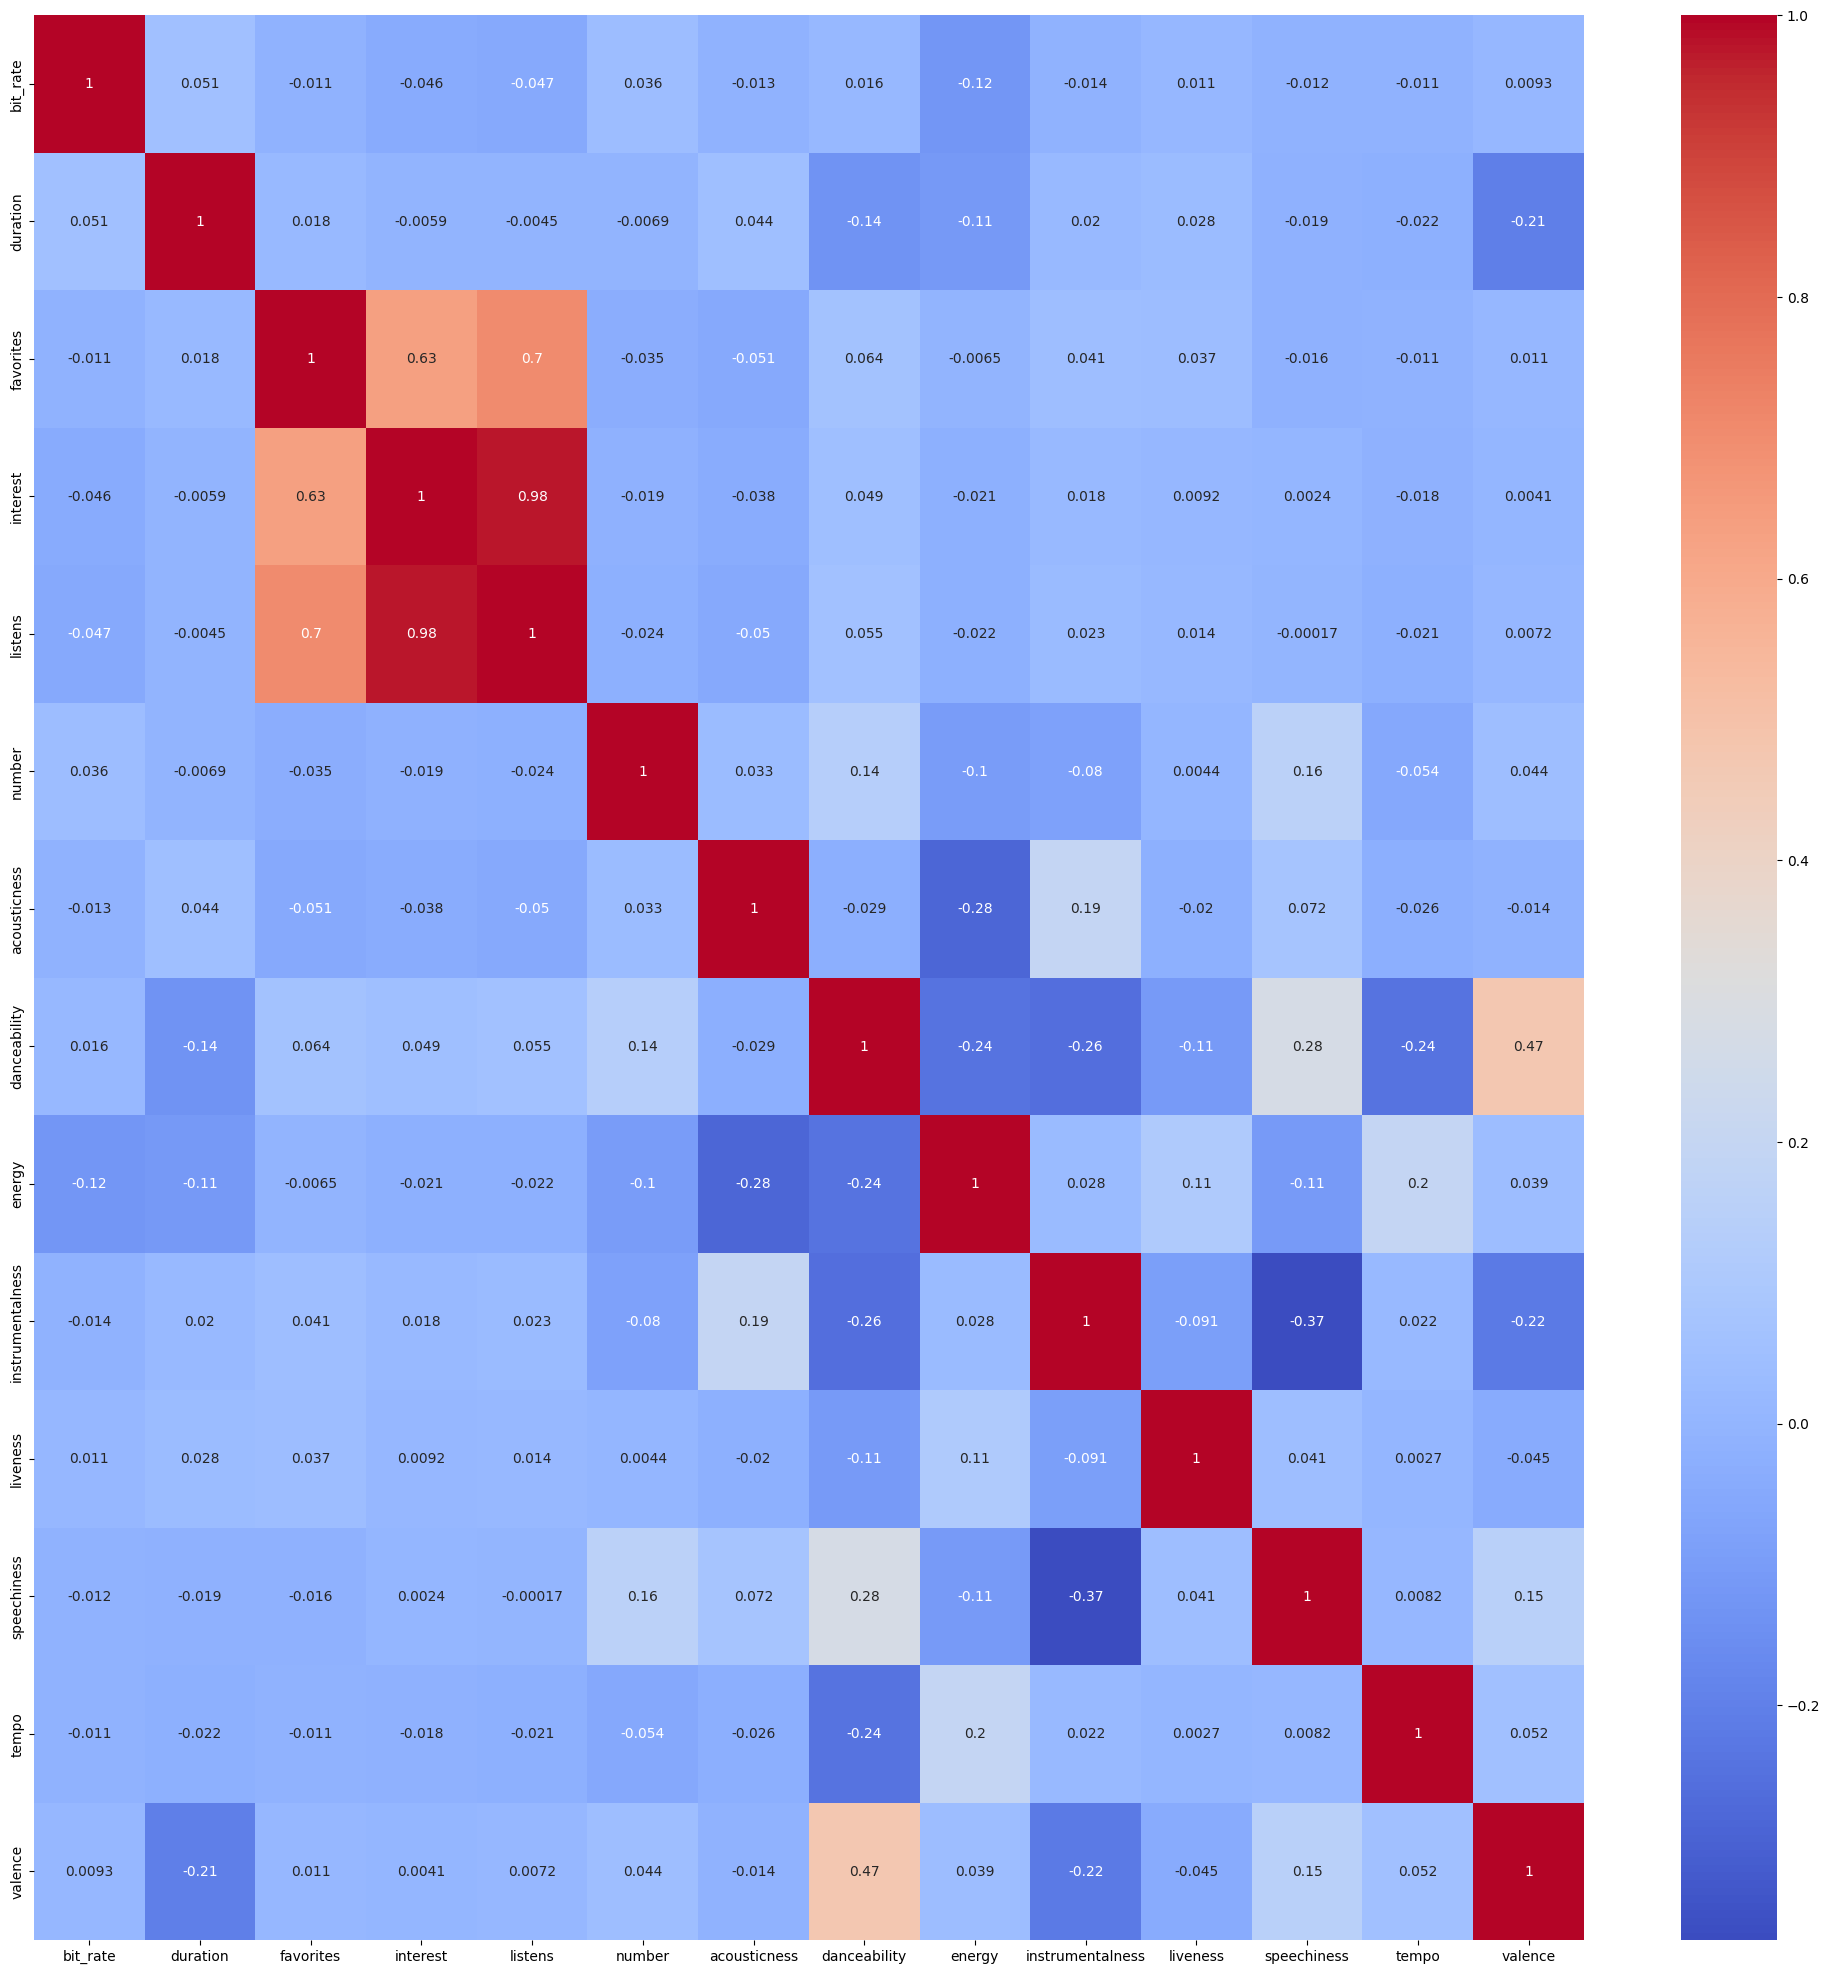

In [30]:
# heatmap of correlation matrix for numerical columns

corr = correlation_data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()